# Comparison density profiles

> Lessons in Advanced Astrophysics  
Kinematics and dynamics of galaxies  
1 Jun 2022  
Jorge Anais

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Radius in kpc
r = np.linspace(0.1, 20.0, num=2000)

## Pseudo-isothermal sphere
$$
\rho_{\text{PIS}} = \rho_0 \frac{1}{\frac{r^2}{r^2_c} + 1}
$$

In [3]:
def pse(r: np.ndarray, rho_0: float, r_c:float) -> np.ndarray:
    """Pseudo-isothermal sphere density profile"""
    return rho_0 * r_c ** 2 / (r ** 2 + r_c ** 2)

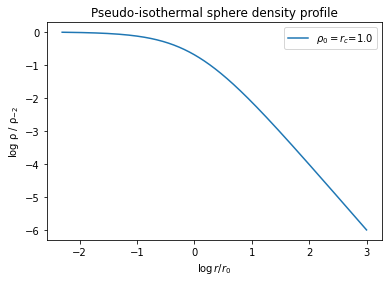

In [4]:
rho_0 = 1.0
r_c = 1.0

plt.plot(np.log(r/r_c), np.log(pse(r, rho_0, r_c)/rho_0), label=f"$ρ_0=r_c$={r_c}")

plt.title("Pseudo-isothermal sphere density profile")
plt.xlabel("$\log r / r_{0}$")
plt.ylabel("log ρ / ρ$_{-2}$")
plt.legend()
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.show()

## Navarro-Frenk-White (NFW) profile

$$
\rho_{\text{NFW}}(r) =  \frac{4 \rho_{-2}}{\frac{r}{r_{-2}}}\left(\frac{r}{r_{-2}} + 1 \right)^{-2}
$$

In [5]:
def NFW_density(r:np.ndarray, rho_2: float, r_2: float) -> np.ndarray:
    """Navarro-Frenk-White density profile (Navarro+ 1996, 1997)"""
    x = r/r_2
    return 4.0 * rho_2  / x * np.power(x + 1, -2.0)

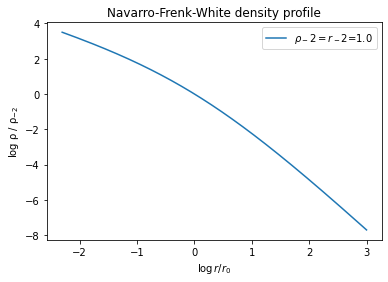

In [6]:
rho_2 = 1.0
r_2 = 1.0

plt.plot(np.log(r/r_2), np.log(NFW_density(r, rho_2, r_2)/rho_2), label=f"$ρ_{-2}=r_{-2}$={r_c}")

plt.title("Navarro-Frenk-White density profile")
plt.xlabel("$\log r / r_{0}$")
plt.ylabel("log ρ / ρ$_{-2}$")
plt.legend()
ymin, ymax = plt.ylim()
plt.ylim(ymin, ymax)
plt.show()

## Einasto profile

$$
\rho_{\text{Ein}}(r)= \rho_{-2} \exp \left( -2n \left[\left(\frac{r}{r_{-2}} \right)^{1/n} - 1\right]\right)
$$

In [7]:
def Einasto_density(r: np.ndarray, rho_2: float, r_2: float, n: float) -> np.ndarray:
    """Einasto density profile (Navarro+ 2004, 2010, Mamon & Lokas 2005)"""
    return rho_2 * np.exp(-2 * n * (np.power(r/r_2, 1/n) - 1))


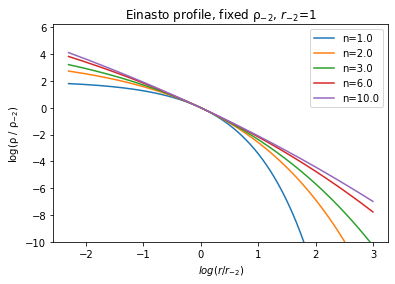

In [37]:
n_ = [1.0, 2.0, 3.0, 6.0, 10.0]
rho_2 = 1.0
r_2 = 1.0

for n in n_:
    plt.plot(np.log(r/r_2), np.log(Einasto_density(r, rho_2, r_2, n)/rho_2), label=f"n={n}")

plt.title("Einasto profile, fixed ρ$_{-2}$, $r_{-2}$=1")
plt.xlabel("$log(r / r_{-2})$")
plt.ylabel("log(ρ / ρ$_{-2}$)")
plt.legend()
ymin, ymax = plt.ylim()
plt.ylim(-10, ymax)
plt.show()

## Comparison between density profiles

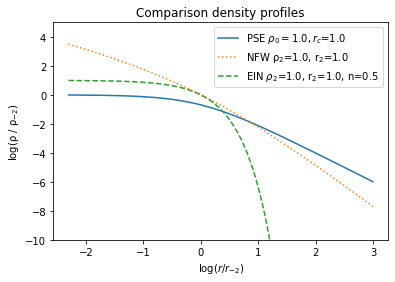

In [15]:
# Parameters
rho_0 = 1.0
r_c = 1.0
rho_2 = 1.0
r_2 = 1.0
n = 0.5  # using n=6-7 similar to NFW


plt.plot(np.log(r/r_c), np.log(pse(r, rho_0, r_c)/rho_0), linestyle="solid", label=f"PSE $ρ_0={rho_0}, r_c$={r_c}")
plt.plot(np.log(r/r_2), np.log(NFW_density(r, rho_2, r_2)/rho_2), linestyle="dotted", label=f"NFW ρ$_{2}$={rho_2}, r$_{2}$={r_2}")
plt.plot(np.log(r/r_2), np.log(Einasto_density(r, rho_2, r_2, n)/rho_2), linestyle="dashed", label=f"EIN $ρ_{2}$={rho_2}, r$_{2}$={r_2}, n={n}")

plt.title("Comparison density profiles")
plt.xlabel("$\log(r / r_{-2})$")
plt.ylabel("log(ρ / ρ$_{-2})$")
ymin, ymax = plt.ylim()
plt.ylim(-10, 5)
plt.legend()
plt.show()

## Logarithmic slope of density

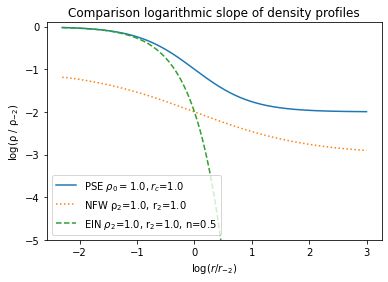

In [36]:
# Parameters
rho_0 = 1.0
r_c = 1.0
rho_2 = 1.0
r_2 = 1.0
n = 0.5  # using n=6-7 similar to NFW

slope_iso = np.gradient(np.log(pse(r, rho_0, r_c)/rho_0), np.log(r))
slope_nfw = np.gradient(np.log(NFW_density(r, rho_2, r_2)/rho_2), np.log(r))
slope_ein = np.gradient(np.log(Einasto_density(r, rho_2, r_2, n)/rho_2), np.log(r))
slope_ein_analytical = -2*np.power(r/r_2, 1/n)

plt.plot(np.log(r/r_2), slope_iso, linestyle="solid", label=f"PSE $ρ_0={rho_0}, r_c$={r_c}")
plt.plot(np.log(r/r_2), slope_nfw, linestyle="dotted", label=f"NFW ρ$_{2}$={rho_2}, r$_{2}$={r_2}")
plt.plot(np.log(r/r_2), slope_ein, linestyle="dashed", label=f"EIN $ρ_{2}$={rho_2}, r$_{2}$={r_2}, n={n}")
# plt.plot(np.log(r/r_2), slope_ein_analytical, linestyle="dashdot")

plt.title("Comparison logarithmic slope of density profiles")
plt.xlabel("$\log(r / r_{-2})$")
plt.ylabel("log(ρ / ρ$_{-2})$")
ymin, ymax = plt.ylim()
plt.ylim(-5, .1)
plt.legend()
plt.show()